<a href="https://www.kaggle.com/code/sachinfulare/sentimentanalysis-sachin?scriptVersionId=166018808" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


In [3]:
train_data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv')
train_data

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE
...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,Danny Mueller,False,A top-notch thriller with genuine surprises an...,POSITIVE
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,Jennifer Clayton,True,Some people find Derek Zoolander funny and lik...,NEGATIVE
162755,infinite_enigma_luke_skywalker,Bryan Wilson,False,"This fun, gentle comedy focuses mainly on them...",POSITIVE
162756,emerald_oracle_iron_man_wolverine,Erik Parker,False,"The film is rescued by a strong third act, but...",NEGATIVE


In [4]:
train_data.shape

(162758, 5)

In [5]:
train_data.isnull().sum()

movieid                  0
reviewerName             0
isFrequentReviewer       0
reviewText            6447
sentiment                0
dtype: int64

In [6]:
train_data.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment'],
      dtype='object')

In [7]:
movie_data = pd.read_csv('/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv')
movie_data

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143253,sherlock_holmes_surreal_james_bond,Sherlock Holmes Surreal James Bond,14.0,NaN,NaN,2002-08-27,NaN,90.0,"Action, Adventure, Anime",Japanese,William Sims,NaN,ADV Films,NaN
143254,mr._miyagi_katniss_everdeen_harmony,Mr. Miyagi Katniss Everdeen Harmony,NaN,NaN,NaN,NaN,NaN,99.0,Drama,English,Robert Paddock,NaN,NaN,NaN
143255,elegant_emerald_valiant_donnie_darko,Elegant Emerald Valiant Donnie Darko,71.0,NaN,NaN,NaN,NaN,43.0,Documentary,English,Roy Lovelace,NaN,NaN,NaN
143256,wonder_hermione_granger_hulk_v,Wonder Hermione Granger Hulk V,NaN,NaN,NaN,NaN,2006-11-21,63.0,Drama,English,Dwayne Clayton,NaN,NaN,NaN


In [8]:
movie_data.shape

(143258, 14)

In [9]:
movie_data.columns

Index(['movieid', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')

In [10]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               143258 non-null  object 
 1   title                 143258 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   rating                13991 non-null   object 
 4   ratingContents        13991 non-null   object 
 5   releaseDateTheaters   30773 non-null   object 
 6   releaseDateStreaming  79420 non-null   object 
 7   runtimeMinutes        129431 non-null  float64
 8   genre                 132175 non-null  object 
 9   originalLanguage      129400 non-null  object 
 10  director              143258 non-null  object 
 11  boxOffice             14743 non-null   object 
 12  distributor           23001 non-null   object 
 13  soundType             15917 non-null   object 
dtypes: float64(2), object(12)
memory usage: 15.3+ MB


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


In [12]:
movie_data.isnull().sum()

movieid                      0
title                        0
audienceScore            70010
rating                  129267
ratingContents          129267
releaseDateTheaters     112485
releaseDateStreaming     63838
runtimeMinutes           13827
genre                    11083
originalLanguage         13858
director                     0
boxOffice               128515
distributor             120257
soundType               127341
dtype: int64

In [13]:
movie_data.drop_duplicates(subset='movieid',inplace=True)
movie_data

,movieid,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,han_solo_heroic_myth_wonder_woman,Han Solo Heroic Myth Wonder Woman,50.0,NaN,NaN,NaN,2018-08-25,75.0,"Comedy, Horror, Sci-fi",English,Claude Nicolet,NaN,NaN,NaN
1,voyage_tyler_durden_han_solo_stardust,Voyage Tyler Durden Han Solo Stardust,NaN,NaN,NaN,NaN,2020-02-11,114.0,Drama,English,Nathan Haack,NaN,NaN,NaN
2,norman_bates_ferris_bueller_hermione_granger_v...,Norman Bates Ferris Bueller Hermione Granger V...,43.0,NaN,NaN,NaN,NaN,120.0,Drama,Korean,Theresa Smith,NaN,NaN,NaN
3,elegant_hermione_granger,Elegant Hermione Granger,60.0,NaN,NaN,NaN,2020-10-23,90.0,"Action, Mystery & thriller",English,Donald Lewis,NaN,NaN,NaN
4,adventure_rocky_balboa,Adventure Rocky Balboa,70.0,NaN,NaN,NaN,2017-03-27,80.0,"Fantasy, Adventure, Animation",English,Howard Simms,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143252,james_bond_jason_bourne,James Bond Jason Bourne,NaN,NaN,NaN,NaN,2019-01-03,131.0,"Action, Mystery & thriller",Hindi,Reginald Davis,NaN,NaN,NaN
143253,sherlock_holmes_surreal_james_bond,Sherlock Holmes Surreal James Bond,14.0,NaN,NaN,2002-08-27,NaN,90.0,"Action, Adventure, Anime",Japanese,William Sims,NaN,ADV Films,NaN
143254,mr._miyagi_katniss_everdeen_harmony,Mr. Miyagi Katniss Everdeen Harmony,NaN,NaN,NaN,NaN,NaN,99.0,Drama,English,Robert Paddock,NaN,NaN,NaN
143255,elegant_emerald_valiant_donnie_darko,Elegant Emerald Valiant Donnie Darko,71.0,NaN,NaN,NaN,NaN,43.0,Documentary,English,Roy Lovelace,NaN,NaN,NaN


In [14]:
movie_data.shape

(126404, 14)

In [15]:
df1=pd.DataFrame(train_data)
df2=pd.DataFrame(movie_data)
data = pd.merge(df1,df2,on='movieid',how='left')
data

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,Danny Mueller,False,A top-notch thriller with genuine surprises an...,POSITIVE,The Joker Ethereal Captain Jack Sparrow Fantastic,NaN,NaN,NaN,NaN,2004-01-06,96.0,Romance,English,Gertrude Fonner,NaN,NaN,NaN
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,Jennifer Clayton,True,Some people find Derek Zoolander funny and lik...,NEGATIVE,E.T. Hannibal Lecter Vito Corleone Katniss Eve...,20.0,PG-13,"['Crude and Sexual Content', 'Brief Strong Lan...",2016-02-12,2016-05-24,102.0,"Comedy, Adventure",English,Susan Oley,$28.8M,Paramount Pictures,NaN
162755,infinite_enigma_luke_skywalker,Bryan Wilson,False,"This fun, gentle comedy focuses mainly on them...",POSITIVE,Infinite Enigma Luke Skywalker,78.0,PG-13,"['Some Language', 'Suggestive References']",NaN,2022-06-17,90.0,"Comedy, Drama",English,Bryant Reams,NaN,NaN,Dolby Digital
162756,emerald_oracle_iron_man_wolverine,Erik Parker,False,"The film is rescued by a strong third act, but...",NEGATIVE,Emerald Oracle Iron Man Wolverine,39.0,NaN,NaN,1996-11-16,1998-11-03,88.0,"Kids & family, Holiday, Comedy",English,Lisa Cruz,$60.6M,20th Century Fox,Surround


# Exploratory data analysis
1.Analysis of data

2.Handling missing values

3.Visualisation

In [16]:
data.shape

(162758, 18)

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
audienceScore,149510.0,65.214541,19.937695,0.0,51.0,68.0,82.0,100.0
runtimeMinutes,159382.0,106.911828,22.138131,4.0,93.0,104.0,118.0,561.0


In [18]:
data.isnull().sum()

movieid                     0
reviewerName                0
isFrequentReviewer          0
reviewText               6447
sentiment                   0
title                       0
audienceScore           13248
rating                  63724
ratingContents          63724
releaseDateTheaters     35834
releaseDateStreaming    16185
runtimeMinutes           3376
genre                    2438
originalLanguage         3290
director                    0
boxOffice               52776
distributor             40663
soundType               85367
dtype: int64

In [19]:
data.columns

Index(['movieid', 'reviewerName', 'isFrequentReviewer', 'reviewText',
       'sentiment', 'title', 'audienceScore', 'rating', 'ratingContents',
       'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes',
       'genre', 'originalLanguage', 'director', 'boxOffice', 'distributor',
       'soundType'],
      dtype='object')

In [20]:
data.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE,Marvelous Pirate,65.0,PG-13,"['Violence', 'Brief Strong Language', 'Substan...",2022-10-21,2022-10-28,105.0,"Comedy, Animation, Adventure, Fantasy",English,Bennie Basso,NaN,Netflix,NaN
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE,Tony Montana Frodo Baggins V Rocky Balboa,NaN,NaN,NaN,NaN,2013-01-08,91.0,Action,English,Alma White,NaN,NaN,NaN
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE,Darth Vader Katniss Everdeen Sorcerer Donnie D...,80.0,PG-13,"['Language', 'A Scene of Sensuality', 'Sports ...",2018-11-21,2019-02-12,130.0,Drama,English,Bobby Oleary,$115.7M,"Warner Bros. Pictures, Metro-Goldwyn-Mayer",NaN
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE,Lara Croft Glimmer,NaN,NaN,NaN,NaN,2020-06-02,15.0,Drama,Spanish,Eric Hutcherson,NaN,NaN,NaN
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE,Jason Bourne Surreal The Terminator Indiana Jones,97.0,R,"['Language', 'Drug Content', 'Sexuality', 'Str...",2003-01-17,2004-06-08,131.0,"Crime, Drama",Portuguese (Brazil),John Trent,$7.6M,Miramax Films,"Surround, Dolby SR, Dolby Digital, Dolby A, Do..."


In [21]:
data.tail()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment,title,audienceScore,rating,ratingContents,releaseDateTheaters,releaseDateStreaming,runtimeMinutes,genre,originalLanguage,director,boxOffice,distributor,soundType
162753,the_joker_ethereal_captain_jack_sparrow_fantastic,Danny Mueller,False,A top-notch thriller with genuine surprises an...,POSITIVE,The Joker Ethereal Captain Jack Sparrow Fantastic,NaN,NaN,NaN,NaN,2004-01-06,96.0,Romance,English,Gertrude Fonner,NaN,NaN,NaN
162754,e.t._hannibal_lecter_vito_corleone_katniss_eve...,Jennifer Clayton,True,Some people find Derek Zoolander funny and lik...,NEGATIVE,E.T. Hannibal Lecter Vito Corleone Katniss Eve...,20.0,PG-13,"['Crude and Sexual Content', 'Brief Strong Lan...",2016-02-12,2016-05-24,102.0,"Comedy, Adventure",English,Susan Oley,$28.8M,Paramount Pictures,NaN
162755,infinite_enigma_luke_skywalker,Bryan Wilson,False,"This fun, gentle comedy focuses mainly on them...",POSITIVE,Infinite Enigma Luke Skywalker,78.0,PG-13,"['Some Language', 'Suggestive References']",NaN,2022-06-17,90.0,"Comedy, Drama",English,Bryant Reams,NaN,NaN,Dolby Digital
162756,emerald_oracle_iron_man_wolverine,Erik Parker,False,"The film is rescued by a strong third act, but...",NEGATIVE,Emerald Oracle Iron Man Wolverine,39.0,NaN,NaN,1996-11-16,1998-11-03,88.0,"Kids & family, Holiday, Comedy",English,Lisa Cruz,$60.6M,20th Century Fox,Surround
162757,james_t._kirk_phenomenal_zephyr_chronicles,Howard Evans,False,A peerless exercise in stimulus response.,POSITIVE,James T. Kirk Phenomenal Zephyr Chronicles,57.0,R,['Language'],2009-10-16,2009-12-29,86.0,"Horror, Mystery & thriller",English,Philip Stuck,$107.9M,Paramount Pictures,NaN


**Handling Missing Values in 'audienceScore' column**

In [22]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data['audienceScore']=imputer.fit_transform(data['audienceScore'].values.reshape(-1,1))
data['audienceScore']

0         65.000000
1         65.214541
2         80.000000
3         65.214541
4         97.000000
            ...    
162753    65.214541
162754    20.000000
162755    78.000000
162756    39.000000
162757    57.000000
Name: audienceScore, Length: 162758, dtype: float64

**SimpleImputer technique to handle missing values in 'runtimeMinutes' columns using strategy mean.**

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
data['runtimeMinutes']=imputer.fit_transform(data['runtimeMinutes'].values.reshape(-1,1))
data['runtimeMinutes']

0         105.0
1          91.0
2         130.0
3          15.0
4         131.0
          ...  
162753     96.0
162754    102.0
162755     90.0
162756     88.0
162757     86.0
Name: runtimeMinutes, Length: 162758, dtype: float64

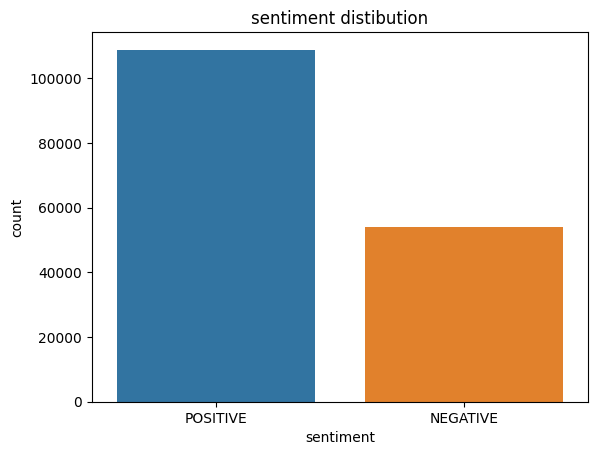

,sentiment,count
0,POSITIVE,108761
1,NEGATIVE,53997


In [24]:
import seaborn as sns
import matplotlib.pyplot as plot

count = data['sentiment'].value_counts().reset_index()
count.columns = ['sentiment', 'count']
sns.barplot(x='sentiment',y='count',data=count)
plot.title('sentiment distibution')
plot.show()
count

In [31]:
#function for scaling features(feature scaling)
from sklearn.preprocessing import MinMaxScaler
def scaling_fun(data,columns):
    min_max_scale = MinMaxScaler()
    min_max_scale.fit(data[columns])
    return min_max_scale

In [32]:
# processing the data into MinMaxScaler 
numerical_cols = ['audienceScore','runtimeMinutes']
scaler_modle=scaling_fun(data.copy(),numerical_cols)
scaled_data=pd.DataFrame(scaler_modle.transform(data[numerical_cols]))
scaled_data.columns=data[numerical_cols].columns #since we scaled only the numerical values 
                                                        #we need to concatenate to actual dataframe
scaled_data

,audienceScore,runtimeMinutes
0,0.650000,0.181329
1,0.652145,0.156194
2,0.800000,0.226212
3,0.652145,0.019749
4,0.970000,0.228007
...,...,...
162753,0.652145,0.165171
162754,0.200000,0.175943
162755,0.780000,0.154399
162756,0.390000,0.150808


# preprocessing
**Data Cleaning**


In [25]:
#function Tokenize------->
data['reviewText'] = data['reviewText'].astype(str) #cast the selected object value
                                                    #dataType to specified dataType
def tokenizeText(text):
    return text.split()
data['reviewText'] = data['reviewText'].apply(tokenizeText)


In [26]:
#function for removing numerical values-------->
import re
data['reviewText'] = data['reviewText'].astype(str)

def rmv_Numerical(text):
    numerical_pattern = r'\b\d+\b'
    return re.sub(numerical_pattern,'',text)
data['reviewText'] = data['reviewText'].apply(rmv_Numerical)

In [27]:
#function to remove short words------>
data['reviewText'] = data['reviewText'].astype(str)
def remove_shortWord(text,threshold=3):
    short_word_pattern = r'\b\w{1,' + str(threshold - 1) + r'}\b'
    text_without_short_words = re.sub(short_word_pattern, '', text)
    return text_without_short_words
data['reviewText'] = data['reviewText'].apply(remove_shortWord)

In [28]:
#function to remove special characters------>
def remove_special_characters(text):
    special_characters_pattern = r'[^a-zA-Z0-9\s]'  # Matches any character that is not a letter, digit, or whitespace
    text_without_special_characters = re.sub(special_characters_pattern, '', text)
    return text_without_special_characters

#function to remove white spaces------->
def remove_spaces(text):
    spaces_pattern = r'\s+'  # Matches one or more whitespace characters
    return re.sub(spaces_pattern, '', text) 

#function to remove URL's--------->
def remove_URL(text):
    urls_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'  # Matches URLs
    # Use the sub() function from the re module to replace all occurrences of URLs with an empty string
    text_without_urls = re.sub(urls_pattern, '', text)
    return text_without_urls

data['reviewText'] = data['reviewText'].apply(remove_special_characters)
data['reviewText'] = data['reviewText'].apply(remove_spaces)
data['reviewText'] = data['reviewText'].apply(remove_URL)

# Pipelining
